<a href="https://colab.research.google.com/github/alekhya-latech/NHIS/blob/main/Top_5_Cancers_and_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective : Prediction of Top 5 Cancer(Four Types of Skin Cancer, Breast Cancer, Prostate cancer, Colorectal cancer and colon cancer) using NHIS 2021 Adult Sample dataset

Steps:
1.Created new column - 'TOP_CANCER', where 1 is stored if a person has top 5 cancers and for rest of the people stores 0. Resulting in 2597 1's in that column.

2. Removed the existing columns of top 5 cancer, inorder to remove duplicity

3.Removed attributes having excessive missing values(>5000), resulting in 204 columns

4.Calculated GINI Index of attributes, to know what are the impacting factors

5.Created bargraphs about the following attribute values in breast cancer people:

*   Gender

*   Race

*   Age

*   Hypertension
*   Arthiritis



*   High Cholestrol
*   Diabetes




*   BMI


*   Family POverty Ratio

6. Removed 'CANEV_A'(Have cancer) and NUMCAN_A(Number of reported types of cancers) and WTFA_A(Final Annual Weight)

7. Performed feature selection using feature selection by decision tree, random forest and logistic regression odds ratio, and selected top 40 in each algorithm, resulting in 81 columns

8. Removed 6 features that are not related or repeated.

9.Performed Data modeling using the below algorithms and evaluated performance using Sensitivity(recall), accuracy, precision and area under receiver operating characteristic (ROC) curve (AUC or ROC value).


*   Decision Tree

*   AdaBoost

*   Artificial neural network (ANN)


*   Logistic Regression


*   Naive Bayes




















**Objective** : Prediction of **Diabetes** using NHIS 2021 Adult Sample dataset

Steps: 1.Removed Don'tknow/Refused/Not Ascertain from DIBEV_A column.

2.Removed DIBLAST1, since the features has data of people who don't have diabetes.

3.Removed attributes having excessive missing values(>5000), resulting in 204 columns

4.Calculated GINI Index of attributes, to know what are the impacting factors

5.Created bargraphs about the following attribute values in breast cancer people:

Gender

General Health status

Age

Hypertension

Difficulty walking

High Cholestrol

BMI

Family POverty Ratio


Performed feature selection using feature selection by SelectKbest,chisquare test, information gain and LASSO and selected top 15 in each algorithm, resulting in 23 features

9.Performed Data modeling using the below algorithms and evaluated performance using Sensitivity(recall), accuracy, precision and area under receiver operating characteristic (ROC) curve (AUC or ROC value).

Decision Tree

AdaBoost

Artificial neural network (ANN)

Logistic Regression

Naive Bayes

['COLRCCAN_A', 'HDNCKCAN_A', 'UTERUCAN_A', 'THYROCAN_A', 'THROACAN_A', 'STOMACAN_A', 'SKNDKCAN_A', 'SKNNMCAN_A', 'SKNMCAN_A', 'RECTUCAN_A', 'PROSTCAN_A', 'PANCRCAN_A', 'OVARYCAN_A', 'MOUTHCAN_A', 'MELANCAN_A', 'LYMPHCAN_A', 'LUNGCAN_A', 'LIVERCAN_A', 'LEUKECAN_A', 'LARYNCAN_A', 'GALLBCAN_A', 'ESOPHCAN_A', 'COLONCAN_A', 'CERVICAN_A', 'BREASCAN_A', 'BRAINCAN_A', 'BONECAN_A', 'BLOODCAN_A', 'BLADDCAN_A']
[198, 48, 117, 119, 31, 19, 195, 789, 328, 16, 445, 15, 80, 14, 189, 122, 115, 21, 54, 4, 5, 11, 185, 160, 698, 23, 30, 25, 121]


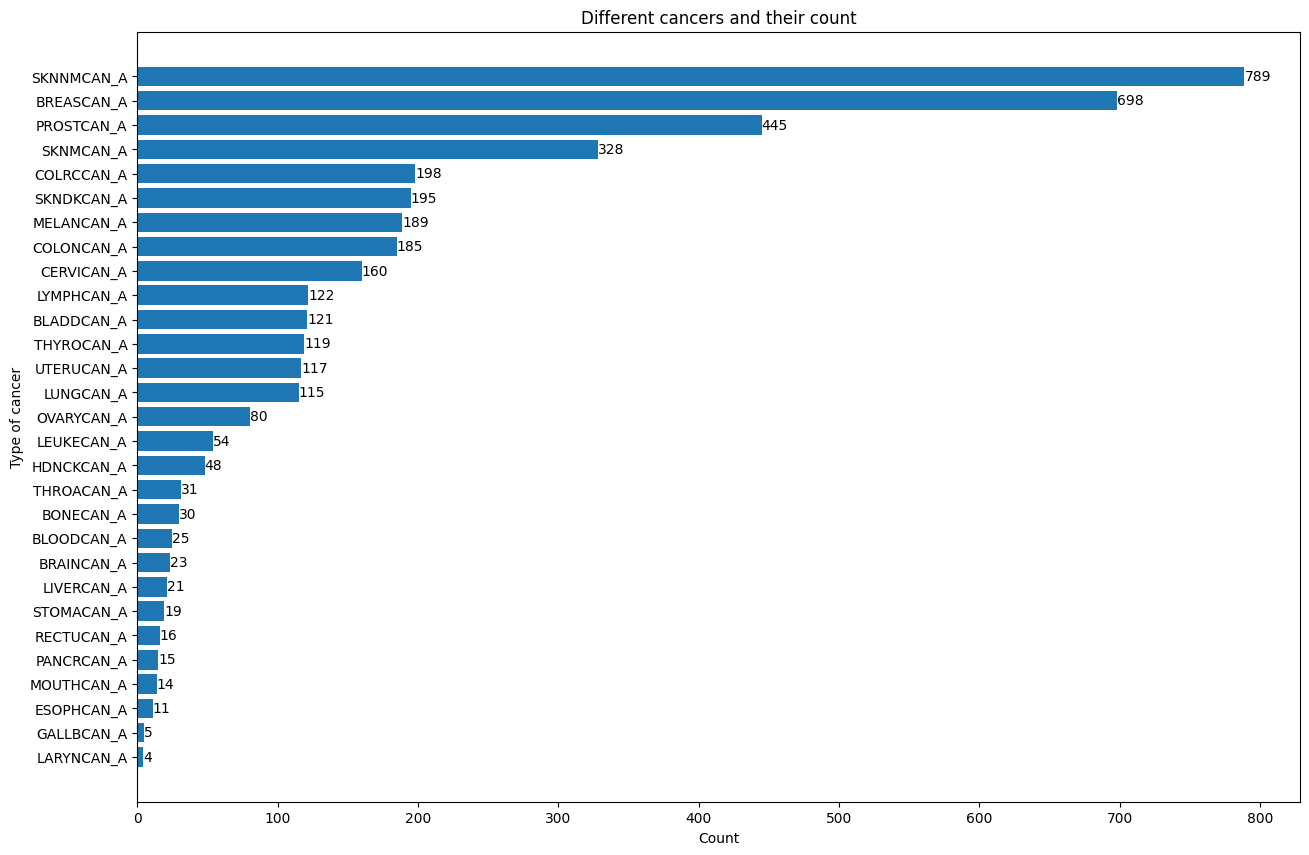

In [ ]:
#Different types of cancers and their count
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/adult21.csv")
df = df.drop('NUMCAN_A',axis =1)

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i],y[i])

cancer_type = []
count = []
i = 0
while(i<621):
  col_name = df.columns[i]
  if "CAN_A" in col_name:
    yes_count = df[col_name].value_counts()[1]
    cancer_type.append(col_name)
    count.append(yes_count)
  i= i+1
print(cancer_type)
print(count)
type_df = pd.DataFrame({"Type of cancer":cancer_type,
                  "Count":count})

df_sorted= type_df.sort_values('Count')
plt.figure(figsize = (15, 10))
plt.barh("Type of cancer", "Count", data= df_sorted)
# addlabels(cancer_type, count)
for i, cnt in enumerate(df_sorted['Count']):
    plt.text(cnt, i, str(cnt), ha='left', va='center')

plt.title("Different cancers and their count")

plt.xlabel("Count")
plt.ylabel("Type of cancer")

    # visualizing the plot
plt.show()

#Output
# Skin non melanoma cancer,  breast cancer, prostate cancer, Skin melanoma cancer, Colorectal cancer,  Skin cancer (don't know what kind),
# Melanoma cancer, colon cancer,  cervical cancer,  lymphoma cancer,  Bladdercancer, Thyroid cancer,  Utereus cancer, lung cancer, ovarian cancer,
# Leukemia, Head and neck cancers, Thorat cancer, bone cancer,  blood cancer,  brain cancer,  liver cancer, Stomach cancer,  Rectal cancer,
# pancreatic cancer, mouth cancer, esophagus cancer, gall bladder cancer, laryn cancer



In [ ]:
from sqlalchemy.sql.elements import Null
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/adult21.csv")


data.loc[((data['BREASCAN_A'] == 1) | (data['SKNDKCAN_A']==1) | (data['SKNNMCAN_A']==1)|(data['SKNMCAN_A']==1)|(data['MELANCAN_A']==1) |(data['PROSTCAN_A']==1)|(data['COLRCCAN_A']==1)|(data['COLONCAN_A']==1)), 'TOP_CANCER'] = 1
for i in data.index:
  if(data['TOP_CANCER'][i]!=1):
    data['TOP_CANCER'][i] = 0

print(data['TOP_CANCER'].value_counts())
data = data.drop(['BREASCAN_A','SKNDKCAN_A','SKNNMCAN_A','SKNMCAN_A','MELANCAN_A','PROSTCAN_A','COLRCCAN_A','COLONCAN_A'], axis=1)
data = data.drop(['HHX','WTFA_A'], axis=1)

remove_list = []
for i in range(len(data.columns)):
  column_name = data.columns[i]
  if((data[column_name].isnull().sum())>5000):
    remove_list.append(column_name)
data.drop(remove_list, axis=1, inplace=True)
print("Count of attributes having more than 5000 missing values :", len(remove_list))
print("Remaining features count :",len(data.columns))

# # Replacing missing with mode
print("\nFeature\t\t missing_count")
for column_name in data.columns:
  missing_count = data[column_name].isnull().sum()
  if(missing_count!=0):
    print(column_name ,"\t", missing_count)
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)



<ipython-input-1-1f802ef77349>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOP_CANCER'][i] = 0


0.0    26885
1.0     2597
Name: TOP_CANCER, dtype: int64
Count of attributes having more than 5000 missing values : 410
Remaining features count : 203

Feature		 missing_count
MAXEDUCP_A 	 85
INCOTHR_A 	 1220
INCRETIRE_A 	 1220
INCWELF_A 	 1220
INCSSISSDI_A 	 1220
INCSSRR_A 	 1220
WRKHLTHFC_A 	 2752
LIVEHEP_A 	 564
DIBLAST1_A 	 3134
USPLKIND_A 	 2795
WELLNESS_A 	 322
HINOTYR_A 	 2220
STEPS_A 	 2536
WLK13M_A 	 2713
WLK100_A 	 2536
HEARNYRM_A 	 40
HEARQTRM_A 	 29


In [ ]:
print(len(data),len(data.columns))

29482 205


In [ ]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = data['TOP_CANCER'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attribute ={}
for key in data.columns:
    gini_attribute[key] = gini_split_a(key)
    #print(f'Gini for {key} is {gini_attribute[key]:.3f}')

sorted_gini = sorted(gini_attribute.items(), key=lambda x:x[1])
for i in range(len(sorted_gini)):
  print(sorted_gini[i][0],"\t",sorted_gini[i][1])

TOP_CANCER 	 0.0
NUMCAN_A 	 0.04983681293632025
CANEV_A 	 0.050962584872229336
AGEP_A 	 0.14472590492452528
POVRATTC_A 	 0.14801120023690256
MEDICARE_A 	 0.14899391332513182
HIKIND02_A 	 0.15012487064519395
OVER65FLG_A 	 0.1502317013116241
INCSSRR_A 	 0.15186236986706048
SHTPNUEV_A 	 0.15357947405504865
INCRETIRE_A 	 0.15367128138981292
PCNTADTWFP_A 	 0.1549268227214454
INCWRKO_A 	 0.15493571428577388
PCNTADTWKP_A 	 0.15507826877375078
EMPWRKLSW1_A 	 0.15536316140669273
HOUYRSLIV_A 	 0.15626198259574234
LEGMSTAT_A 	 0.1565383553658974
MARSTAT_A 	 0.15665984515614884
ARTHEV_A 	 0.1568554619151802
HIKIND03_A 	 0.15712913669770004
HISPALLP_A 	 0.15750823313363493
RX12M_A 	 0.15764664200851206
HYPEV_A 	 0.157704677317356
PARSTAT_A 	 0.15771411542425412
PCNTLT18TC 	 0.1577341273277726
PCNTKIDS_A 	 0.15774110316394507
SHTFLU12M_A 	 0.1578222785895093
CHLEV_A 	 0.15785286669398682
INCINTER_A 	 0.15789158451850877
HEARAID_A 	 0.1579435682765566
SAPARENTSC_A 	 0.1581423194630678
DIFF_A 	 0.1583

In [ ]:
top_cancer = data[data['TOP_CANCER']==1]
print(len(top_cancer))

2597


Text(0, 0.5, 'Percent')

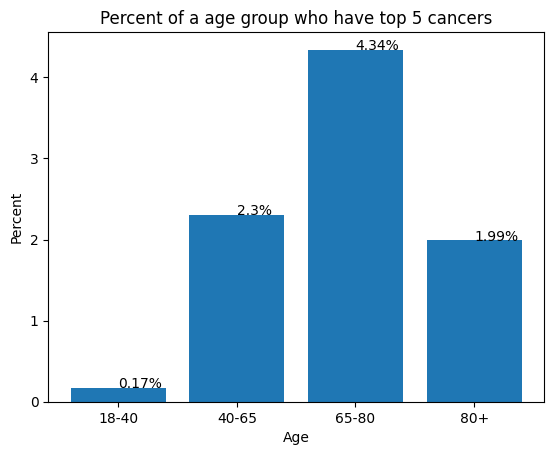

In [ ]:
#Age risk on Top 5 Cancer
from matplotlib import pyplot as plt
u40=0
u65 = 0
u80 = 0
o80=0
for i in top_cancer['AGEP_A']:
  if i<40:
    u40= u40+1
  elif i<65:
    u65 = u65+1
  elif i<80:
    u80 = u80+1
  else:
    o80 = o80+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["18-40", "40-65", "65-80", "80+"]
y = [round(u40/len(data)*100,2), round(u65/len(data)*100,2), round(u80/len(data)*100,2), round(o80/len(data)*100,2)]
plt.bar(x,y)
plt.title("Percent of a age group who have top 5 cancers")
addlabels(x, y)
plt.xlabel("Age")
plt.ylabel("Percent")


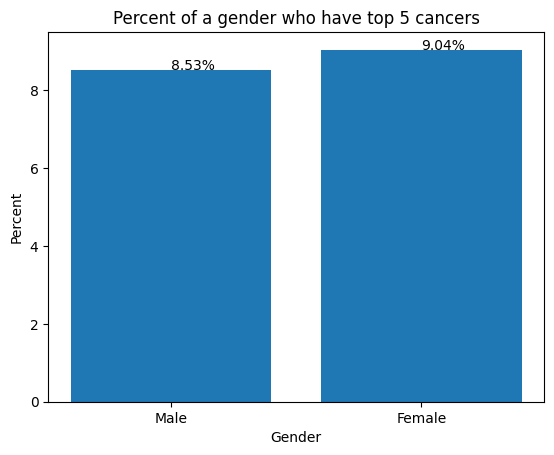

In [ ]:
#SEX related to Top 5 Cancer risk
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')
from matplotlib import pyplot as plt
x = ["Male", "Female"]
y = [round(((top_cancer["SEX_A"].value_counts()[1])/data["SEX_A"].value_counts()[1]),4)*100,round(((top_cancer["SEX_A"].value_counts()[2])/data["SEX_A"].value_counts()[2]),4)*100]
plt.bar(x,y)
plt.title("Percent of a gender who have top 5 cancers")
plt.xlabel("Gender")
plt.ylabel("Percent")
addlabels(x,y)


Text(0, 0.5, 'Percent')

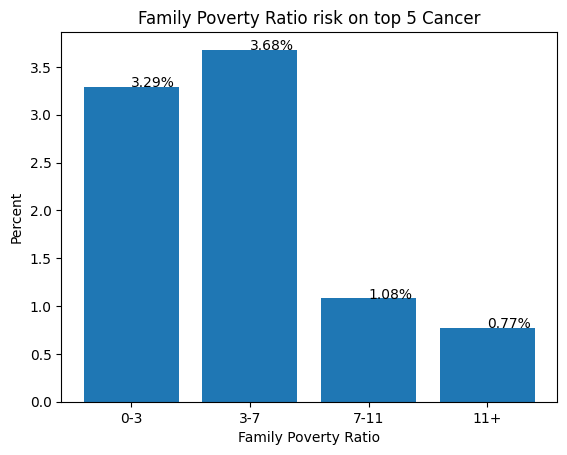

In [ ]:
#Family Poverty Ratio risk on Top 5 Cancer
u3=0
u7 = 0
u11 = 0
o11=0
for i in top_cancer['POVRATTC_A']:
  if i<3:
    u3= u3+1
  elif i<7:
    u7 = u7+1
  elif i<11:
    u11 = u11+1
  else:
    o11 = o11+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["0-3", "3-7", "7-11", "11+"]
y = [round(u3/len(data)*100,2),round(u7/len(data)*100,2),round(u11/len(data)*100,2),round(o11/len(data)*100,2)]
plt.bar(x,y)
plt.title("Family Poverty Ratio risk on top 5 Cancer")
addlabels(x, y)
plt.xlabel("Family Poverty Ratio")
plt.ylabel("Percent")


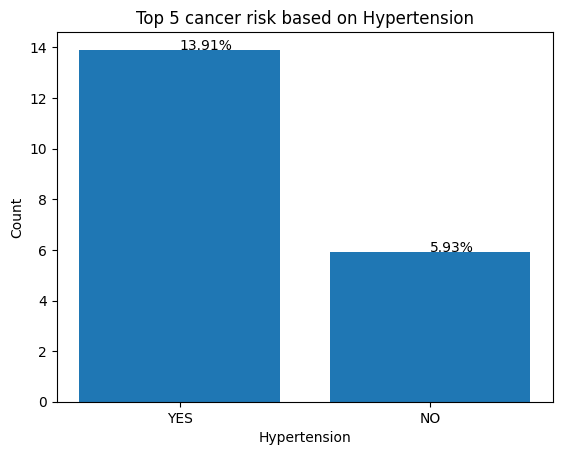

In [ ]:
#HYPERTENSION related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((top_cancer["HYPEV_A"].value_counts()[1]/data["HYPEV_A"].value_counts()[1])*100,2),round((top_cancer["HYPEV_A"].value_counts()[2]/data["HYPEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Top 5 cancer risk based on Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Count")
addlabels(x,y)

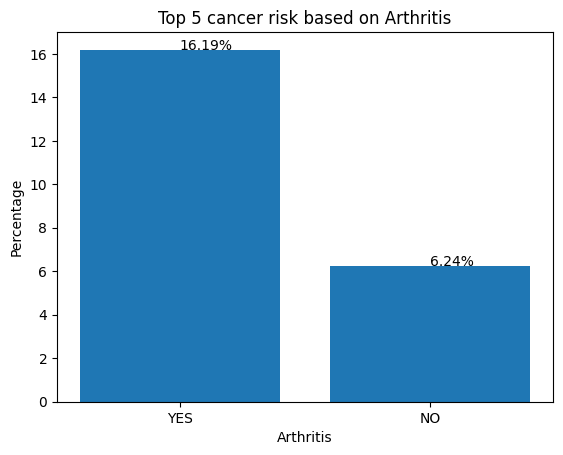

In [ ]:
#Arthritis related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((top_cancer["ARTHEV_A"].value_counts()[1]/data["ARTHEV_A"].value_counts()[1])*100,2),round((top_cancer["ARTHEV_A"].value_counts()[2]/data["ARTHEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Top 5 cancer risk based on Arthritis")
plt.xlabel("Arthritis")
plt.ylabel("Percentage")
addlabels(x,y)

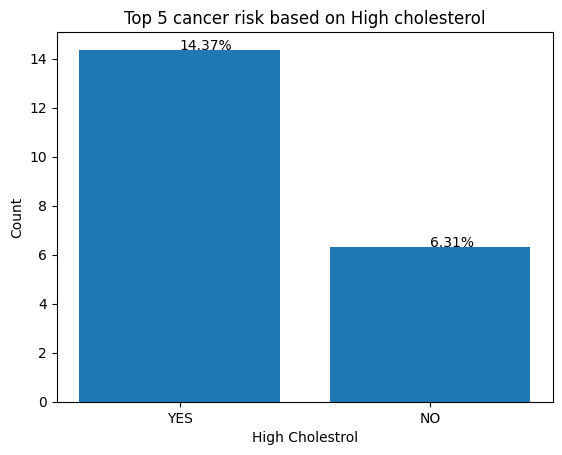

In [ ]:
# High cholesterol related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((top_cancer["CHLEV_A"].value_counts()[1]/data["CHLEV_A"].value_counts()[1])*100,2),round((top_cancer["CHLEV_A"].value_counts()[2]/data["CHLEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Top 5 cancer risk based on High cholesterol")
plt.xlabel("High Cholestrol")
plt.ylabel("Count")
addlabels(x,y)

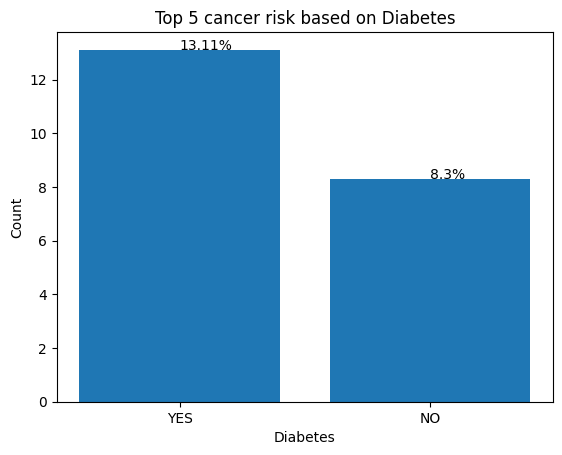

In [ ]:
# Diabetes related to Top % Cancer risk

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((top_cancer["DIBEV_A"].value_counts()[1]/data["DIBEV_A"].value_counts()[1])*100,2),round((top_cancer["DIBEV_A"].value_counts()[2]/data["DIBEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Top 5 cancer risk based on Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
addlabels(x,y)

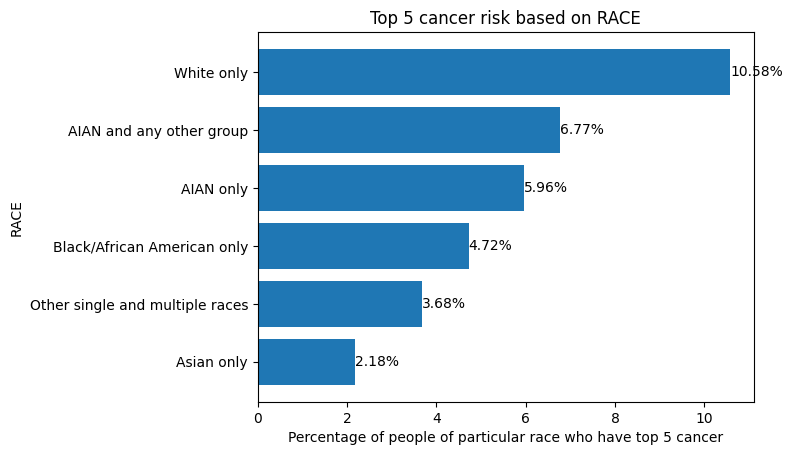

In [ ]:
#RACE related to Top 5 Cancer risk

x = ["White only", "Black/African American only", "Asian only", "AIAN only", "AIAN and any other group", "Other single and multiple races"]
y = [round((top_cancer["RACEALLP_A"].value_counts()[1]/data["RACEALLP_A"].value_counts()[1])*100,2),
     round((top_cancer["RACEALLP_A"].value_counts()[2]/data["RACEALLP_A"].value_counts()[2])*100,2),
     round((top_cancer["RACEALLP_A"].value_counts()[3]/data["RACEALLP_A"].value_counts()[3])*100,2),
     round((top_cancer["RACEALLP_A"].value_counts()[4]/data["RACEALLP_A"].value_counts()[4])*100,2),
     round((top_cancer["RACEALLP_A"].value_counts()[5]/data["RACEALLP_A"].value_counts()[5])*100,2),
     round((top_cancer["RACEALLP_A"].value_counts()[6]/data["RACEALLP_A"].value_counts()[6])*100,2)]


type_df = pd.DataFrame({"Race":x,
                  "Count":y})

df_sorted= type_df.sort_values('Count')
plt.barh("Race","Count", data=df_sorted)
plt.title("Top 5 cancer risk based on RACE")
plt.xlabel("Percentage of people of particular race who have top 5 cancer")
plt.ylabel("RACE")
for i, cnt in enumerate(df_sorted['Count']):
    plt.text(cnt, i, str(cnt)+'%', ha='left', va='center')

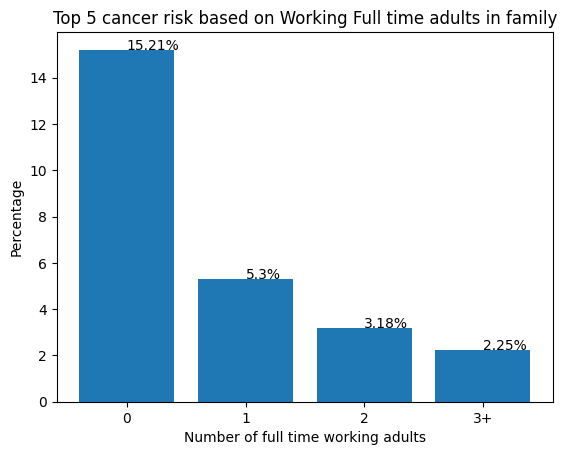

In [ ]:
from matplotlib import pyplot as plt
x = ['0',
    '1',
   '2',
   '3+']
y = [round((top_cancer["PCNTADTWFP_A"].value_counts()[0]/data["PCNTADTWFP_A"].value_counts()[0])*100,2),
     round((top_cancer["PCNTADTWFP_A"].value_counts()[1]/data["PCNTADTWFP_A"].value_counts()[1])*100,2),
     round((top_cancer["PCNTADTWFP_A"].value_counts()[2]/data["PCNTADTWFP_A"].value_counts()[2])*100,2),
     round((top_cancer["PCNTADTWFP_A"].value_counts()[3]/data["PCNTADTWFP_A"].value_counts()[3])*100,2)]
plt.bar(x,y)
type_df = pd.DataFrame({"Working":x,
                  "Percent":y})

df_sorted= type_df.sort_values('Percent')

plt.title("Top 5 cancer risk based on Working Full time adults in family")
plt.ylabel("Percentage")
plt.xlabel("Number of full time working adults")
addlabels(x,y)



3    9917
4    9225
2    9144
9     733
1     463
Name: BMICAT_A, dtype: int64
47


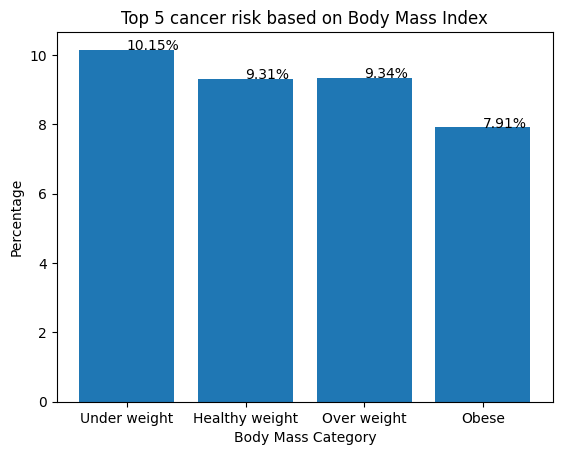

In [ ]:
x = ['Under weight',
    'Healthy weight',
   'Over weight',
   'Obese']
y = [round((top_cancer["BMICAT_A"].value_counts()[1]/data["BMICAT_A"].value_counts()[1])*100,2),
     round((top_cancer["BMICAT_A"].value_counts()[2]/data["BMICAT_A"].value_counts()[2])*100,2),
     round((top_cancer["BMICAT_A"].value_counts()[3]/data["BMICAT_A"].value_counts()[3])*100,2),
     round((top_cancer["BMICAT_A"].value_counts()[4]/data["BMICAT_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
type_df = pd.DataFrame({"Body Mass":x,
                  "Percent":y})

df_sorted= type_df.sort_values('Percent')

plt.title("Top 5 cancer risk based on Body Mass Index")
plt.ylabel("Percentage")
plt.xlabel("Body Mass Category")
addlabels(x,y)



In [ ]:
#Preprocessing
#Remove features related to cancer
data = data.drop(['CANEV_A','NUMCAN_A'],axis=1)

In [ ]:
#Embedded Methods- LASSO(L1 Regularization)
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

y = data['TOP_CANCER']
X = data.drop('TOP_CANCER',axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.01)  # You can adjust the regularization strength with the alpha parameter
lasso.fit(X_scaled, y)

# Get the non-zero coefficient indices
selected_features_indices = lasso.coef_ != 0

# Print the names of the selected features
lasso = [X.columns[i] for i in range(len(X.columns)) if selected_features_indices[i]]
print("Selected Features: ", lasso)

Selected Features:  ['RATCAT_A', 'RACEALLP_A', 'PCNTADTWFP_A', 'MEDICARE_A', 'MAXEDUCP_A', 'OVER65FLG_A', 'HISP_A', 'AGEP_A', 'INCRETIRE_A', 'SHTFLU12M_A', 'HEARNYRM_A', 'HEARAID_A', 'ARTHEV_A']


In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gains = mutual_info_classif(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_scores.sort_values(by='Information Gain', ascending=False, inplace=True)
k = 15  # Number of features to select
gain = feature_scores['Feature'][:k].tolist()
print(gain)

['AGEP_A', 'MEDICARE_A', 'OVER65FLG_A', 'HIKIND02_A', 'INCSSRR_A', 'SHTPNUEV_A', 'INCRETIRE_A', 'INCWRKO_A', 'PCNTADTWFP_A', 'POVRATTC_A', 'PCNTADTWKP_A', 'EMPWRKLSW1_A', 'PARSTAT_A', 'HISPALLP_A', 'LEGMSTAT_A']


In [ ]:
from scipy.stats import chi2_contingency

chi2_scores = []
p_values = []

for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
features_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
features_scores.sort_values(by='P-value', inplace=True)
k = 15  # Number of features to select
chi = features_scores['Feature'][:k].tolist()
print(chi)

['HIKIND02_A', 'MEDICARE_A', 'INCSSRR_A', 'OVER65FLG_A', 'AGEP_A', 'SHTPNUEV_A', 'INCRETIRE_A', 'PCNTADTWFP_A', 'INCWRKO_A', 'PCNTADTWKP_A', 'EMPWRKLSW1_A', 'HOUYRSLIV_A', 'LEGMSTAT_A', 'MARSTAT_A', 'ARTHEV_A']


In [ ]:
from collections import Counter
selected_count = Counter(chi+gain+lasso).most_common()
print(selected_count)
print(len(selected_count))

[('MEDICARE_A', 3), ('OVER65FLG_A', 3), ('AGEP_A', 3), ('INCRETIRE_A', 3), ('PCNTADTWFP_A', 3), ('HIKIND02_A', 2), ('INCSSRR_A', 2), ('SHTPNUEV_A', 2), ('INCWRKO_A', 2), ('PCNTADTWKP_A', 2), ('EMPWRKLSW1_A', 2), ('LEGMSTAT_A', 2), ('ARTHEV_A', 2), ('HOUYRSLIV_A', 1), ('MARSTAT_A', 1), ('POVRATTC_A', 1), ('PARSTAT_A', 1), ('HISPALLP_A', 1), ('RATCAT_A', 1), ('RACEALLP_A', 1), ('MAXEDUCP_A', 1), ('HISP_A', 1), ('SHTFLU12M_A', 1), ('HEARNYRM_A', 1), ('HEARAID_A', 1)]
25


In [ ]:
selected= []
for i in range(len(selected_count)):
  x = selected_count[i][0]
  selected.append(x)

selected.append('TOP_CANCER')
print(len(selected))

for i in data.columns:
  if i not in selected:
    data = data.drop(i,axis=1)

26


OverSampling- SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=len(data),
    n_features=len(data.columns)-1,
    weights=[0.91],
    flip_y=0,
    random_state=42
)


In [ ]:
print(len(data))

29452


Decision Tree
Accuracy: 84.16143801933187
Specificity: 0.8975310933729348


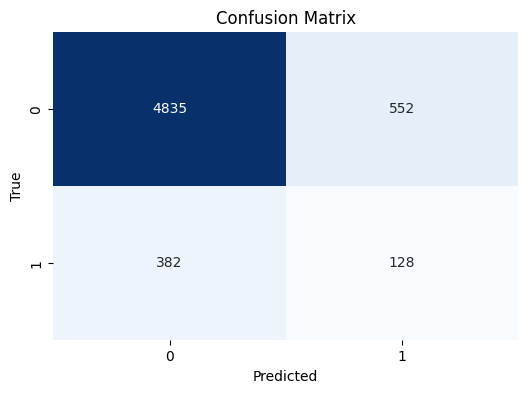

Recall/Sensitivity 0.25098039215686274
Precision: 0.18823529411764706
ROC: 0.5742557427648988
0.8416143801933187 	 0.25098039215686274 	 0.18823529411764706 	 0.5742557427648988 	 0.8975310933729348
Epoch 1/10
1344/1344 [==============================] - 3s 2ms/step - loss: 0.2711
Epoch 2/10
1344/1344 [==============================] - 2s 2ms/step - loss: 0.1672
Epoch 3/10
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1640
Epoch 4/10
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1583
Epoch 5/10
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1564
Epoch 6/10
1344/1344 [==============================] - 2s 2ms/step - loss: 0.1533
Epoch 7/10
1344/1344 [==============================] - 2s 2ms/step - loss: 0.1509
Epoch 8/10
1344/1344 [==============================] - 2s 2ms/step - loss: 0.1464
Epoch 9/10
1344/1344 [==============================] - 3s 2ms/step - loss: 0.1456
Epoch 10/10
185/185 [==============================] -

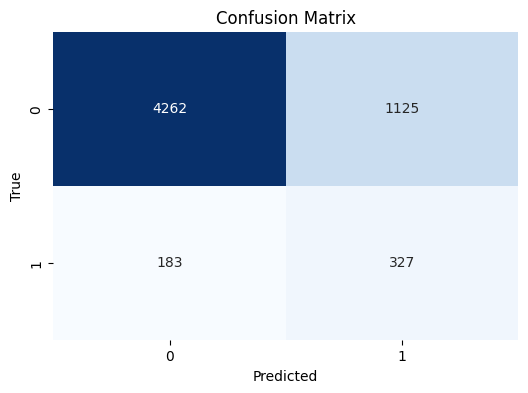

ROC: 0.7943000032758603
0.7781923011700865 	 0.6411764705882353 	 0.22520661157024793 	 0.7943000032758603 	 0.7911639131241879
Naive BAyes
Accuracy: 72.56231982363914
Recall 0.7588235294117647
Precision: 0.20563230605738575
ROC: 0.7406517869817317
0.7256231982363914 	 0.7588235294117647 	 0.20563230605738575 	 0.7406517869817317 	 0.7224800445516986
KNN
Accuracy: 67.55977615736816
Recall 0.7588235294117647
Precision: 0.17776757005052826
ROC: 0.7132710555913473
0.6755977615736816 	 0.7588235294117647 	 0.17776757005052826 	 0.7132710555913473 	 0.66771858177093
AdaBoost
Accuracy: 86.19637103612006
Recall 0.32745098039215687
Precision: 0.2617554858934169
ROC: 0.620009136010075
0.8619637103612006 	 0.32745098039215687 	 0.2617554858934169 	 0.620009136010075 	 0.9125672916279933
GradientBoost
Accuracy: 88.48567068000678
Recall 0.23137254901960785
Precision: 0.291358024691358
ROC: 0.5890480714283114
0.8848567068000678 	 0.23137254901960785 	 0.291358024691358 	 0.5890480714283114 	 0.9467

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 74.90249279294557
[[4046 1341]
 [ 139  371]]


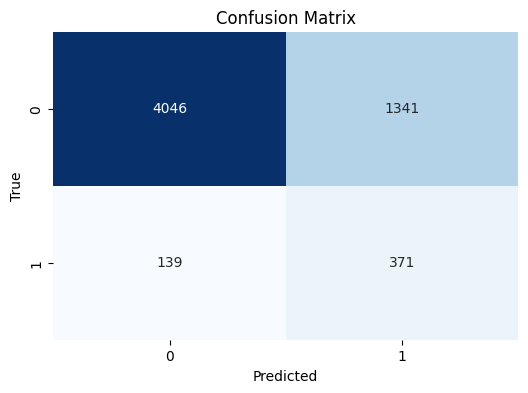

Recall 0.7274509803921568
Precision: 0.2167056074766355
ROC: 0.7392591824180944
0.7490249279294556 	 0.7274509803921568 	 0.2167056074766355 	 0.7392591824180944 	 0.751067384444032


In [ ]:
from imblearn.over_sampling import SMOTE
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('TOP_CANCER', axis=1), data['TOP_CANCER'], test_size=0.2, random_state=42)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
#print("Logistic Regression")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


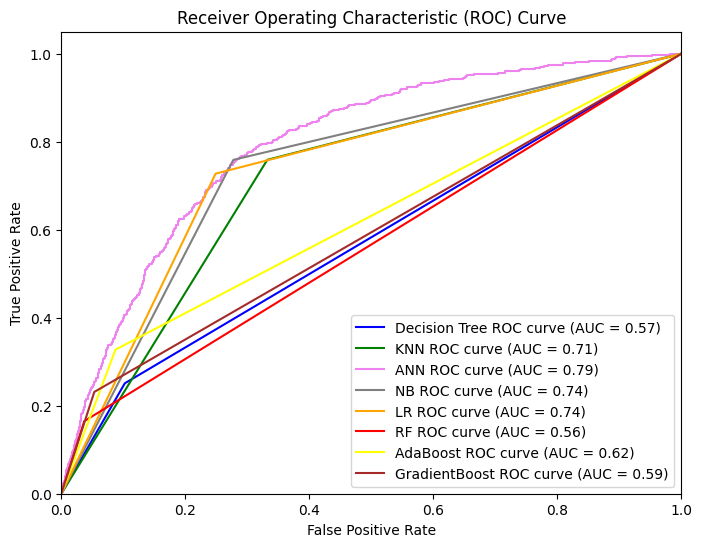

In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='yellow', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='brown', label='GradientBoost ROC curve (AUC = %0.2f)' % gb_roc_auc)





plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

UnderSampling for Top 5 Cancer-Cluster Centroids technique

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Decision Tree
Accuracy: 31.032728506020007
Specificity: 0.2500464080193057
Recall/Sensitivity 0.9470588235294117
Precision: 0.10678753040017687
ROC: 0.5985526157743588
0.3103272850602001 	 0.9470588235294117 	 0.10678753040017687 	 0.5985526157743588 	 0.2500464080193057
Epoch 1/10
131/131 [==============================] - 1s 2ms/step - loss: 4.9436
Epoch 2/10
131/131 [==============================] - 0s 2ms/step - loss: 0.3167
Epoch 3/10
131/131 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 4/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1917
Epoch 5/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1681
Epoch 6/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1476
Epoch 7/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1337
Epoch 8/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1259
Epoch 9/10
131/131 [==============================] - 0s 2ms/step - loss: 0.1211

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


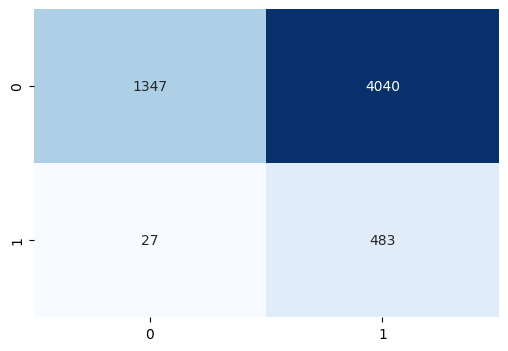

In [ ]:
from imblearn.under_sampling import ClusterCentroids
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('TOP_CANCER', axis=1), data['TOP_CANCER'], test_size=0.2, random_state=42)

cc = ClusterCentroids()
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Logistic Regression")
print("Accuracy:", accuracy*100)


# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


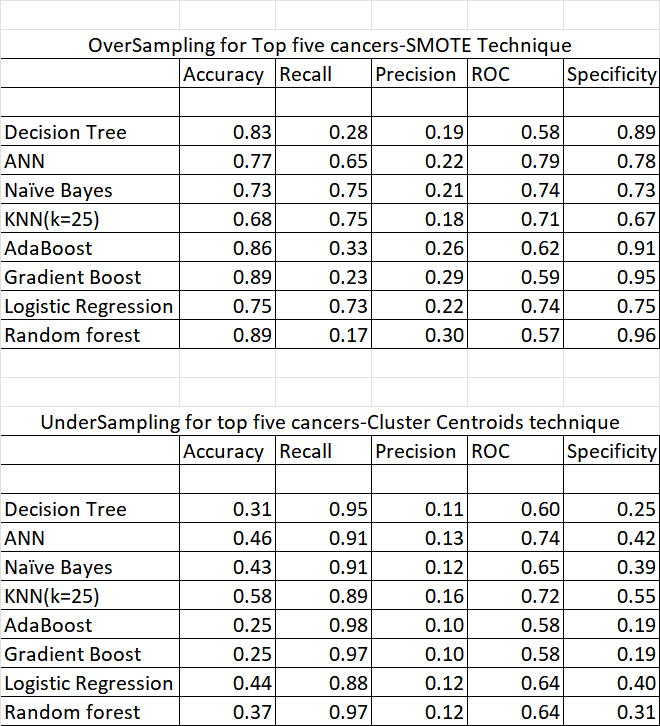

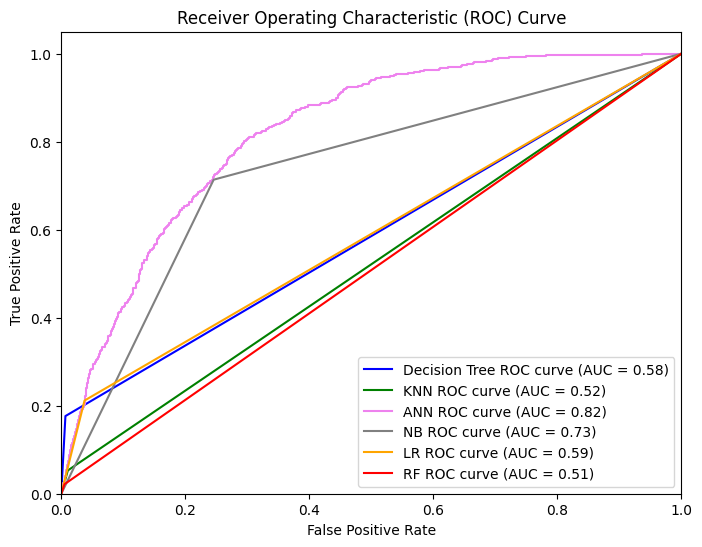

In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Diabetes**

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/adult21.csv")
data = data.drop(['HHX','WTFA_A','DIBLAST1_A'],axis =1)

data['DIBEV_A'] = data['DIBEV_A'].replace({
    2: 0,
    7: None,
    9: None
})

data = data.dropna(axis=0,subset= ['DIBEV_A'])
print("Rows and columns count of data: ",len(data), len(data.columns))


Rows and columns count of data:  29452 619


In [ ]:
#Remove attributes which have more than 5000 missing values
remove_list = []
for i in range(len(data.columns)):
  column_name = data.columns[i]
  if((data[column_name].isnull().sum())>5000):
    remove_list.append(column_name)
data.drop(remove_list, axis=1, inplace=True)
print("Count of attributes having more than 5000 missing values :", len(remove_list))
print("Remaining features count :",len(data.columns))


Count of attributes having more than 5000 missing values : 418
Remaining features count : 201


In [ ]:
# Replacing missing with mode
print("\nFeature\t\t missing_count")
for column_name in data.columns:
  missing_count = data[column_name].isnull().sum()
  if(missing_count!=0):
    print(column_name ,"\t", missing_count)
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)

#diabetes data set
diabetes = data[data['DIBEV_A']==1]
print("Rows and columns count of diabetes data: ",len(diabetes), len(diabetes.columns))


Feature		 missing_count
MAXEDUCP_A 	 84
INCOTHR_A 	 1216
INCRETIRE_A 	 1216
INCWELF_A 	 1216
INCSSISSDI_A 	 1216
INCSSRR_A 	 1216
WRKHLTHFC_A 	 2748
LIVEHEP_A 	 564
USPLKIND_A 	 2791
WELLNESS_A 	 319
HINOTYR_A 	 2220
STEPS_A 	 2533
WLK13M_A 	 2710
WLK100_A 	 2533
HEARNYRM_A 	 40
HEARQTRM_A 	 29
Rows and columns count of diabetes data:  3134 201


In [ ]:
#To know features effecting diabtes
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

def gini_split_a(attribute_name):
    attribute_values = data[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = data['DIBEV_A'][data[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = data.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attribute ={}
for key in data.columns:
    gini_attribute[key] = gini_split_a(key)
    #print(f'Gini for {key} is {gini_attribute[key]:.3f}')

sorted_gini = sorted(gini_attribute.items(), key=lambda x:x[1])
for i in range(len(sorted_gini)):
  print(sorted_gini[i][0],"\t",sorted_gini[i][1])




DIBEV_A 	 0.0
PREDIB_A 	 0.1486508265023395
PHSTAT_A 	 0.1747693406745243
HYPEV_A 	 0.17673550405858812
CHLEV_A 	 0.1782748250873443
POVRATTC_A 	 0.17952367800343272
DIFF_A 	 0.1798171473512928
AGEP_A 	 0.17993625169539826
RX12M_A 	 0.18223201227484812
SHTPNUEV_A 	 0.18300293897742168
MEDICARE_A 	 0.18323164793878666
EQUIP_A 	 0.1832575808550352
HIKIND02_A 	 0.18351800352592634
WEIGHTLBTC_A 	 0.1835521122594524
CHOLLAST_A 	 0.18445847693480882
DISAB3_A 	 0.18464947112504898
SOCWRKLIM_A 	 0.18475707739184064
KIDWEAKEV_A 	 0.18496092264137043
ARTHEV_A 	 0.18496807116983258
INCSSRR_A 	 0.18518511211661523
EMPWRKLSW1_A 	 0.18525305190070726
OVER65FLG_A 	 0.18526724322116458
BMICAT_A 	 0.18536966116114423
PAIFRQ3M_A 	 0.18563955043261302
DRYMTH12M_A 	 0.185671240295115
PCNTADTWKP_A 	 0.18575436698414524
INCWRKO_A 	 0.18588377285738866
CHDEV_A 	 0.18599312682479271
PCNTADTWFP_A 	 0.1860250198920737
UPPOBJCT_A 	 0.18608616765379435
SOCERRNDS_A 	 0.18679098927279347
MIEV_A 	 0.1868009086338229

Visualisation on diabetes data set

Text(0, 0.5, 'Percent Diabetic')

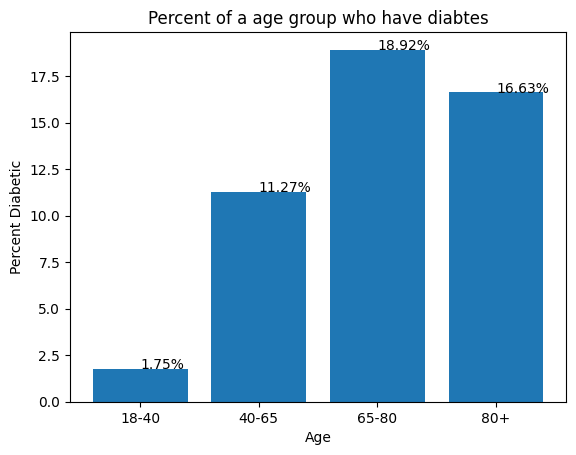

In [ ]:
#Age
from matplotlib import pyplot as plt
u40=0
u65 = 0
u80 = 0
o80=0
du40=0
du65 = 0
du80 = 0
do80=0
for i in diabetes['AGEP_A']:
  if i<40:
    u40= u40+1
  elif i<65:
    u65 = u65+1
  elif i<80:
    u80 = u80+1
  else:
    o80 = o80+1

for i in data['AGEP_A']:
  if i<40:
    du40= du40+1
  elif i<65:
    du65 = du65+1
  elif i<80:
    du80 = du80+1
  else:
    do80 = do80+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["18-40", "40-65", "65-80", "80+"]
y = [round(u40/du40*100,2), round(u65/du65*100,2), round(u80/du80*100,2), round(o80/do80*100,2)]
plt.bar(x,y)
plt.title("Percent of a age group who have diabtes")
addlabels(x, y)
plt.xlabel("Age")
plt.ylabel("Percent Diabetic")


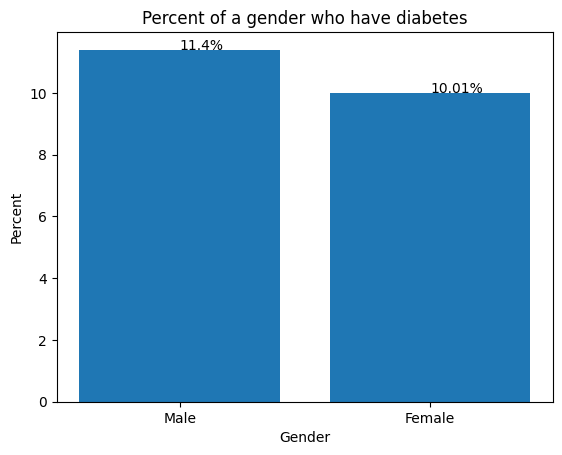

In [ ]:
#SEX
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')
from matplotlib import pyplot as plt
x = ["Male", "Female"]
y = [round(((diabetes["SEX_A"].value_counts()[1])/data["SEX_A"].value_counts()[1]),4)*100,round(((diabetes["SEX_A"].value_counts()[2])/data["SEX_A"].value_counts()[2]),4)*100]
plt.bar(x,y)
plt.title("Percent of a gender who have diabetes")
plt.xlabel("Gender")
plt.ylabel("Percent")
addlabels(x,y)


Text(0, 0.5, 'Percent Diabetic')

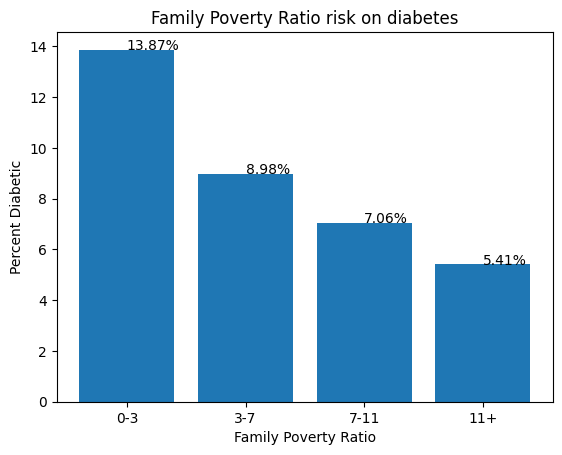

In [ ]:
#Family Poverty Ratio
u3=0
u7 = 0
u11 = 0
o11=0
du3=0
du7 = 0
du11 = 0
do11=0
for i in diabetes['POVRATTC_A']:
  if i<3:
    u3= u3+1
  elif i<7:
    u7 = u7+1
  elif i<11:
    u11 = u11+1
  else:
    o11 = o11+1


for i in data['POVRATTC_A']:
  if i<3:
    du3= du3+1
  elif i<7:
    du7 = du7+1
  elif i<11:
    du11 = du11+1
  else:
    do11 = do11+1

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')

x = ["0-3", "3-7", "7-11", "11+"]
y = [round(u3/du3*100,2),round(u7/du7*100,2),round(u11/du11*100,2),round(o11/do11*100,2)]
plt.bar(x,y)
plt.title("Family Poverty Ratio risk on diabetes")
addlabels(x, y)
plt.xlabel("Family Poverty Ratio")
plt.ylabel("Percent Diabetic")


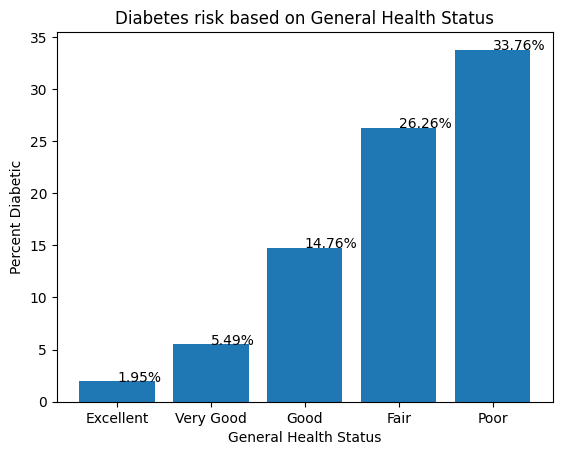

In [ ]:
#PHSTAT_A General HealthStatus

from matplotlib import pyplot as plt
x = ["Excellent", "Very Good", "Good","Fair","Poor"]
y = [round((diabetes["PHSTAT_A"].value_counts()[1]/data["PHSTAT_A"].value_counts()[1])*100,2),
     round((diabetes["PHSTAT_A"].value_counts()[2]/data["PHSTAT_A"].value_counts()[2])*100,2),
     round((diabetes["PHSTAT_A"].value_counts()[3]/data["PHSTAT_A"].value_counts()[3])*100,2),
     round((diabetes["PHSTAT_A"].value_counts()[4]/data["PHSTAT_A"].value_counts()[4])*100,2),
     round((diabetes["PHSTAT_A"].value_counts()[5]/data["PHSTAT_A"].value_counts()[5])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on General Health Status")
plt.xlabel("General Health Status")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

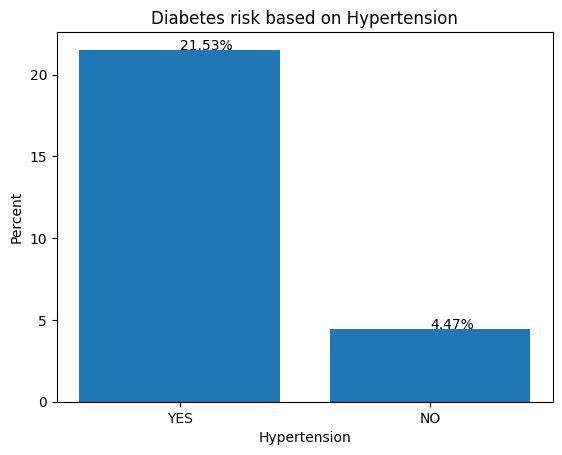

In [ ]:
#HYPERTENSION

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((diabetes["HYPEV_A"].value_counts()[1]/data["HYPEV_A"].value_counts()[1])*100,2),round((diabetes["HYPEV_A"].value_counts()[2]/data["HYPEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Percent")
addlabels(x,y)

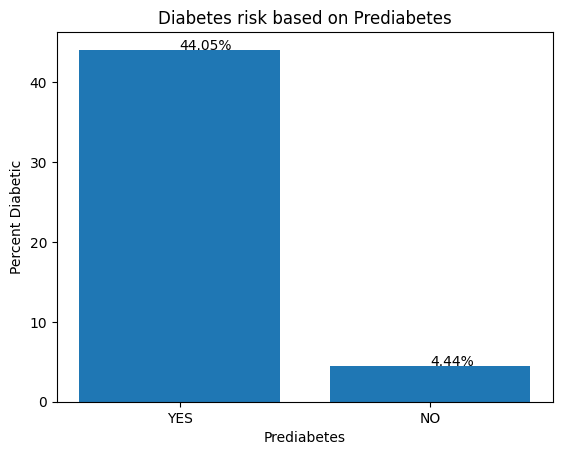

In [ ]:
#PREDIABETES

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((diabetes["PREDIB_A"].value_counts()[1]/data["PREDIB_A"].value_counts()[1])*100,2),round((diabetes["PREDIB_A"].value_counts()[2]/data["PREDIB_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on Prediabetes")
plt.xlabel("Prediabetes")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

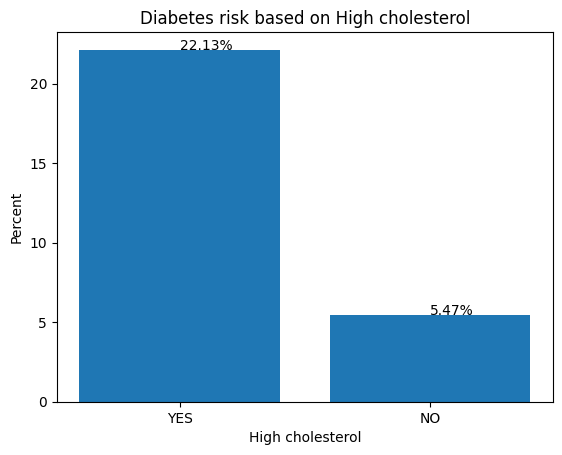

In [ ]:
# High cholesterol

from matplotlib import pyplot as plt
x = ["YES", "NO"]
y = [round((diabetes["CHLEV_A"].value_counts()[1]/data["CHLEV_A"].value_counts()[1])*100,2),round((diabetes["CHLEV_A"].value_counts()[2]/data["CHLEV_A"].value_counts()[2])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on High cholesterol")
plt.xlabel("High cholesterol")
plt.ylabel("Percent")
addlabels(x,y)

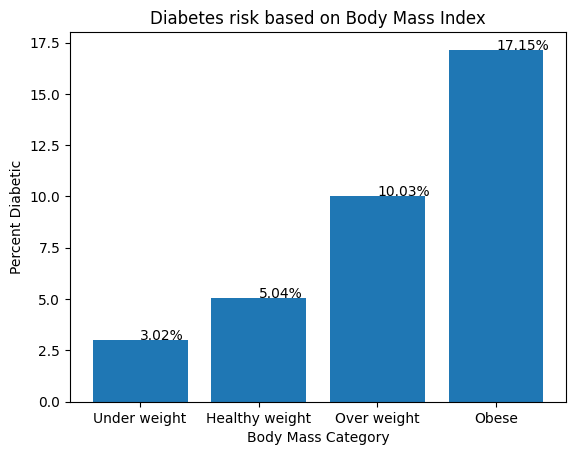

In [ ]:
#BMI
x = ['Under weight',
    'Healthy weight',
   'Over weight',
   'Obese']
y = [round((diabetes["BMICAT_A"].value_counts()[1]/data["BMICAT_A"].value_counts()[1])*100,2),
     round((diabetes["BMICAT_A"].value_counts()[2]/data["BMICAT_A"].value_counts()[2])*100,2),
     round((diabetes["BMICAT_A"].value_counts()[3]/data["BMICAT_A"].value_counts()[3])*100,2),
     round((diabetes["BMICAT_A"].value_counts()[4]/data["BMICAT_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
type_df = pd.DataFrame({"Body Mass":x,
                  "Percent":y})

df_sorted= type_df.sort_values('Percent')

plt.title("Diabetes risk based on Body Mass Index")
plt.ylabel("Percent Diabetic")
plt.xlabel("Body Mass Category")
addlabels(x,y)



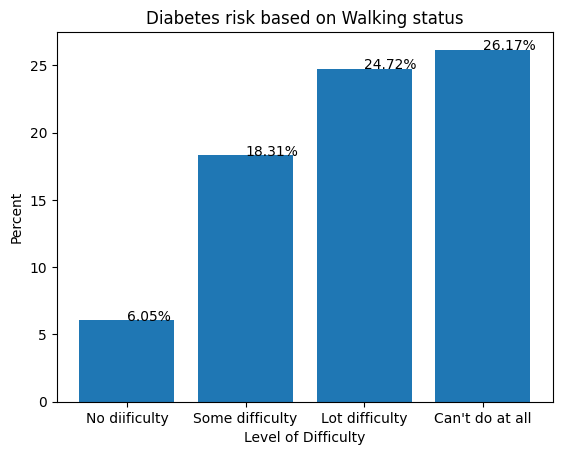

In [ ]:
#Difficulty walking 1/3 mile
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((diabetes["WLK13M_A"].value_counts()[1]/data["WLK13M_A"].value_counts()[1])*100,2),round((diabetes["WLK13M_A"].value_counts()[2]/data["WLK13M_A"].value_counts()[2])*100,2),
     round((diabetes["WLK13M_A"].value_counts()[3]/data["WLK13M_A"].value_counts()[3])*100,2),round((diabetes["WLK13M_A"].value_counts()[4]/data["WLK13M_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on Walking status")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent")
addlabels(x,y)

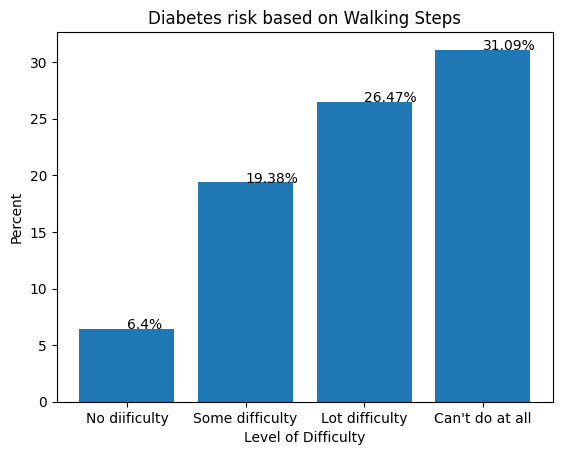

In [ ]:
#Difficulty walking steps
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((diabetes["STEPS_A"].value_counts()[1]/data["STEPS_A"].value_counts()[1])*100,2),round((diabetes["STEPS_A"].value_counts()[2]/data["STEPS_A"].value_counts()[2])*100,2),
     round((diabetes["STEPS_A"].value_counts()[3]/data["STEPS_A"].value_counts()[3])*100,2),round((diabetes["STEPS_A"].value_counts()[4]/data["STEPS_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on Walking Steps")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent")
addlabels(x,y)

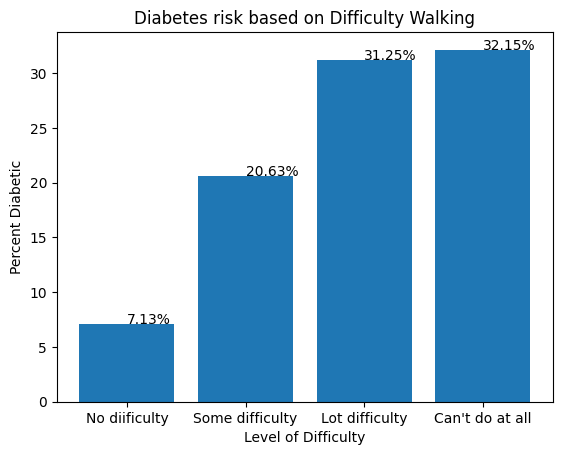

In [ ]:
#Difficulty walking
from matplotlib import pyplot as plt
x = ["No diificulty", "Some difficulty", "Lot difficulty", "Can't do at all"]
y = [round((diabetes["DIFF_A"].value_counts()[1]/data["DIFF_A"].value_counts()[1])*100,2),round((diabetes["DIFF_A"].value_counts()[2]/data["DIFF_A"].value_counts()[2])*100,2),
     round((diabetes["DIFF_A"].value_counts()[3]/data["DIFF_A"].value_counts()[3])*100,2),round((diabetes["DIFF_A"].value_counts()[4]/data["DIFF_A"].value_counts()[4])*100,2)]
plt.bar(x,y)
plt.title("Diabetes risk based on Difficulty Walking")
plt.xlabel("Level of Difficulty")
plt.ylabel("Percent Diabetic")
addlabels(x,y)

In [ ]:
#Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif

y = data['DIBEV_A']
X = data.drop('DIBEV_A',axis=1)

# Select the top 5 features using the mutual_info_classif scoring function
k = 15
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Print the names of the selected features
selectkbest = [X.columns[i] for i in selected_features_indices]
print("Selected Features: ", selectkbest)

Selected Features:  ['DISAB3_A', 'EMPWRKLSW1_A', 'MEDICARE_A', 'AGEP_A', 'SHTPNUEV_A', 'CHOLLAST_A', 'RX12M_A', 'HIKIND02_A', 'SOCWRKLIM_A', 'EQUIP_A', 'DIFF_A', 'PREDIB_A', 'CHLEV_A', 'HYPEV_A', 'PHSTAT_A']


In [ ]:
#Embedded Methods- LASSO(L1 Regularization)
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the Lasso model
lasso = Lasso(alpha=0.01)  # You can adjust the regularization strength with the alpha parameter
lasso.fit(X_scaled, y)

# Get the non-zero coefficient indices
selected_features_indices = lasso.coef_ != 0

# Print the names of the selected features
lasso = [X.columns[i] for i in range(len(X.columns)) if selected_features_indices[i]]
print("Selected Features: ", lasso)

Selected Features:  ['BMICAT_A', 'MEDICARE_A', 'MAXEDUCP_A', 'AGEP_A', 'ANXFREQ_A', 'RX12M_A', 'EQUIP_A', 'DIFF_A', 'DRYMTH12M_A', 'KIDWEAKEV_A', 'PREDIB_A', 'MIEV_A', 'CHLEV_A', 'HYPEV_A', 'PHSTAT_A']


In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gains = mutual_info_classif(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})
feature_scores.sort_values(by='Information Gain', ascending=False, inplace=True)
k = 15  # Number of features to select
gain = feature_scores['Feature'][:k].tolist()
print(gain)


['PREDIB_A', 'PHSTAT_A', 'HYPEV_A', 'AGEP_A', 'RX12M_A', 'CHLEV_A', 'DIFF_A', 'CHOLLAST_A', 'SHTPNUEV_A', 'MEDICARE_A', 'HIKIND02_A', 'SOCWRKLIM_A', 'ARTHEV_A', 'BMICAT_A', 'EQUIP_A']


In [ ]:
from scipy.stats import chi2_contingency

chi2_scores = []
p_values = []

for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p)
features_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
features_scores.sort_values(by='P-value', inplace=True)
k = 15  # Number of features to select
chi = features_scores['Feature'][:k].tolist()
print(chi)

['PHSTAT_A', 'HYPEV_A', 'CHLEV_A', 'DIFF_A', 'PREDIB_A', 'AGEP_A', 'RX12M_A', 'SHTPNUEV_A', 'EQUIP_A', 'MEDICARE_A', 'HIKIND02_A', 'DISAB3_A', 'CHOLLAST_A', 'SOCWRKLIM_A', 'KIDWEAKEV_A']


In [ ]:
from collections import Counter
selected_count = Counter(chi+gain+lasso).most_common()
print(selected_count)
print(len(selected_count))

[('PHSTAT_A', 3), ('HYPEV_A', 3), ('CHLEV_A', 3), ('DIFF_A', 3), ('PREDIB_A', 3), ('AGEP_A', 3), ('RX12M_A', 3), ('EQUIP_A', 3), ('MEDICARE_A', 3), ('SHTPNUEV_A', 2), ('HIKIND02_A', 2), ('CHOLLAST_A', 2), ('SOCWRKLIM_A', 2), ('KIDWEAKEV_A', 2), ('BMICAT_A', 2), ('DISAB3_A', 1), ('ARTHEV_A', 1), ('MAXEDUCP_A', 1), ('ANXFREQ_A', 1), ('DRYMTH12M_A', 1), ('MIEV_A', 1)]
21


**Top 25 selected Features for Diabetes prediction**

PHSTAT_A  General health status

HYPEV_A  Hypertension

CHLEV_A  High Cholestrol

DIFF_A  Difficulty in walking

PREDIB_A  Prediabtes

AGEP_A    Age

EQUIP_A   Use Equipment to get around

MEDICARE_A   Medicare recode

RX12M_A   Took Prescription medicine past 12 m

HIKIND02_A   Kind/s of medicare

SOCWRKLIM_A Work limited due to health problem

SHTPNUEV_A Ever had pneumonia shot

DISAB3_A The Washington Group Short Set Composite Disability Indicator

CHOLLAST_A Last time cholesterol checked

KIDWEAKEV_A Ever had weak/failing kidneys

ARTHEV_A Ever had arthritis

BMICAT_A Categorical Body Mass Index

MAXEDUCP_A Highest level of education of all the adults in the SA's family

ANXFREQ_A How often feel worried, nervous, or anxious

DRYMTH12M_A Dry month past 12m

MIEV_A Ever been told you had a heart attack

INCSSRR_A Income from SS/Railroad Retirement

INCWRKO_A Income from wages


In [ ]:
selected= []
for i in range(len(selected_count)):
  x = selected_count[i][0]
  selected.append(x)

selected.append('DIBEV_A')
print(len(selected))

for i in data.columns:
  if i not in selected:
    data = data.drop(i,axis=1)
print(len(data),len(data.columns))

22
29452 22


In [ ]:
print((data['DIBEV_A'].value_counts()[0])/len(data))

0.8935895694689665


OverSampling

In [ ]:

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=len(data),
    n_features=len(data.columns)-1,
    weights=[0.89],
    flip_y=0,
    random_state=42
)


Decision Tree
Accuracy: 85.18078424715668
Specificity: 0.8985754985754986


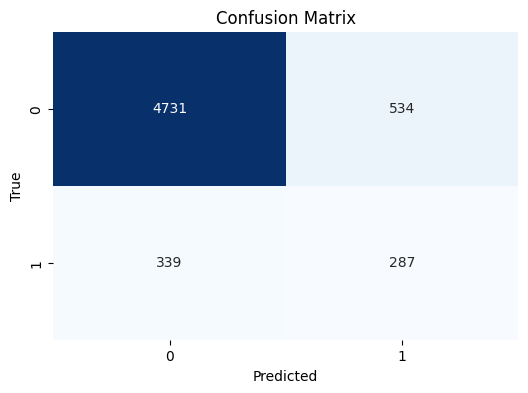

Recall/Sensitivity 0.4584664536741214
Precision: 0.34957369062119364
ROC: 0.67852097612481
0.8518078424715668 	 0.4584664536741214 	 0.34957369062119364 	 0.67852097612481 	 0.8985754985754986
Epoch 1/10
1316/1316 [==============================] - 3s 2ms/step - loss: 0.5167
Epoch 2/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1317
Epoch 3/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1256
Epoch 4/10
1316/1316 [==============================] - 3s 2ms/step - loss: 0.1188
Epoch 5/10
1316/1316 [==============================] - 3s 2ms/step - loss: 0.1127
Epoch 6/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1081
Epoch 7/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1057
Epoch 8/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1043
Epoch 9/10
1316/1316 [==============================] - 2s 2ms/step - loss: 0.1003
Epoch 10/10
185/185 [==============================] - 1s 4m

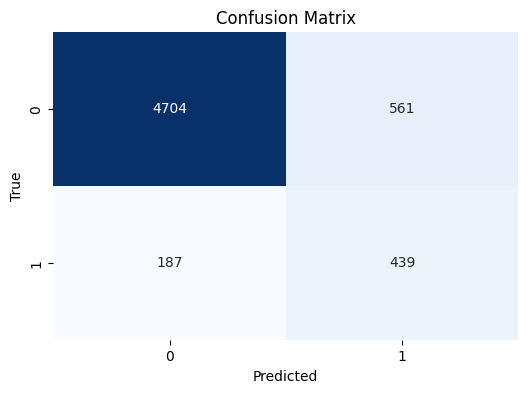

ROC: 0.8904063849218269
0.8730266508232898 	 0.7012779552715654 	 0.439 	 0.8904063849218269 	 0.8934472934472935
Naive BAyes
Accuracy: 80.51264640977762
Recall 0.694888178913738
Precision: 0.3125
ROC: 0.7565608985736781
0.8051264640977762 	 0.694888178913738 	 0.3125 	 0.7565608985736781 	 0.8182336182336183
KNN
Accuracy: 79.98641996265489
Recall 0.7124600638977636
Precision: 0.3086505190311419
ROC: 0.7613582370770869
0.799864199626549 	 0.7124600638977636 	 0.3086505190311419 	 0.7613582370770869 	 0.8102564102564103
AdaBoost
Accuracy: 88.18536750976065
Recall 0.6597444089456869
Precision: 0.4609375
ROC: 0.7840032586038976
0.8818536750976065 	 0.6597444089456869 	 0.4609375 	 0.7840032586038976 	 0.9082621082621083
GradientBoost
Accuracy: 88.01561704294687
Recall 0.6661341853035144
Precision: 0.4562363238512035
ROC: 0.7858686121199433
0.8801561704294687 	 0.6661341853035144 	 0.4562363238512035 	 0.7858686121199433 	 0.9056030389363723
Random forest
Accuracy: 0.8847394330334408
Recal

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


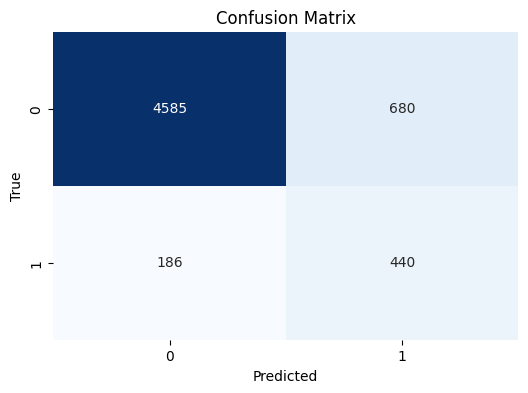

Recall 0.7028753993610224
Precision: 0.39285714285714285
ROC: 0.78686030176978
0.8529960957392633 	 0.7028753993610224 	 0.39285714285714285 	 0.78686030176978 	 0.8708452041785375


In [ ]:
from imblearn.over_sampling import SMOTE
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('DIBEV_A', axis=1), data['DIBEV_A'], test_size=0.2, random_state=42)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
#print("Logistic Regression")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)


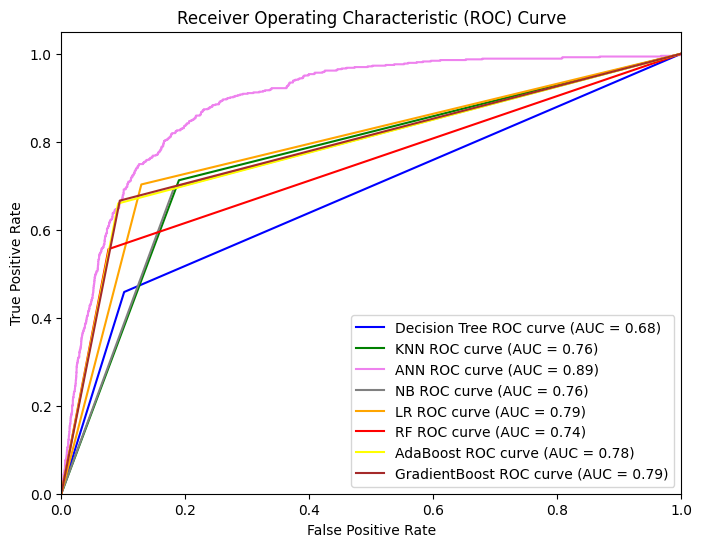

In [ ]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(decision_fpr, decision_tpr, color='blue', label='Decision Tree ROC curve (AUC = %0.2f)' % decision_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', label='KNN ROC curve (AUC = %0.2f)' % knn_roc_auc)
plt.plot(ann_fpr, ann_tpr, color='violet', label='ANN ROC curve (AUC = %0.2f)' % ann_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='grey', label='NB ROC curve (AUC = %0.2f)' % nb_roc_auc)
plt.plot(lg_fpr, lg_tpr, color='orange', label='LR ROC curve (AUC = %0.2f)' % lg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red', label='RF ROC curve (AUC = %0.2f)' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, color='yellow', label='AdaBoost ROC curve (AUC = %0.2f)' % ada_roc_auc)
plt.plot(gb_fpr, gb_tpr, color='brown', label='GradientBoost ROC curve (AUC = %0.2f)' % gb_roc_auc)




plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

UnderSampling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Decision Tree
Accuracy: 47.139704634187744
Specificity: 0.4246913580246914
Recall/Sensitivity 0.8642172523961661
Precision: 0.1515406162464986
ROC: 0.6444543052104288
0.47139704634187746 	 0.8642172523961661 	 0.1515406162464986 	 0.6444543052104288 	 0.4246913580246914
Epoch 1/10
157/157 [==============================] - 1s 2ms/step - loss: 0.2371
Epoch 2/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1606
Epoch 3/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 4/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 5/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 6/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1387
Epoch 7/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1372
Epoch 8/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1348
Epoch 9/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1370


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


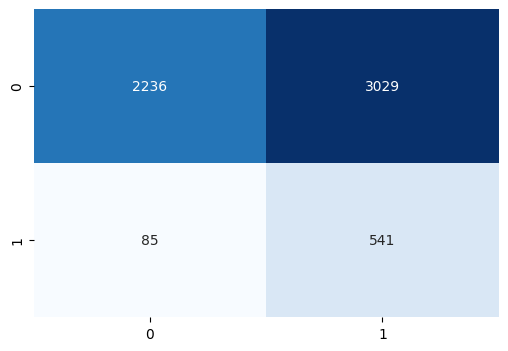

In [ ]:
from imblearn.under_sampling import ClusterCentroids
#Decision Tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_curve, auc, accuracy_score
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(data.drop('DIBEV_A', axis=1), data['DIBEV_A'], test_size=0.2, random_state=42)

cc = ClusterCentroids()
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

model = DecisionTreeClassifier()

# Performing training
model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
y_pred = model.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = sum(y_pred == y_test) / len(y_test)
print("Decision Tree")
print("Accuracy:", accuracy*100)


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall/Sensitivity", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
decision_fpr, decision_tpr, thresholds = roc_curve(y_test, y_pred)
decision_roc_auc = auc(decision_fpr, decision_tpr)
print("ROC:", decision_roc_auc)

print(accuracy,"\t",recall,"\t",precision,"\t",decision_roc_auc,"\t",specificity)


# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
print("ANN")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)



tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
ann_fpr, ann_tpr, thresholds = roc_curve(y_test, y_pred)
ann_roc_auc = auc(ann_fpr, ann_tpr)
print("ROC:", ann_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ann_roc_auc,"\t",specificity)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

print("Naive BAyes")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print("ROC:", nb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",nb_roc_auc,"\t",specificity)

from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with k=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print("KNN")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

#ROC
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred)
knn_roc_auc = auc(knn_fpr, knn_tpr)
print("ROC:", knn_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",knn_roc_auc,"\t",specificity)

#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)
print("AdaBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)
print("ROC:", ada_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",ada_roc_auc,"\t",specificity)

#GradientBoost
import xgboost as xgb
from sklearn.metrics import roc_auc_score, recall_score


# Define the parameters for the Gradient Boosting model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Create the Gradient Boosting model
model = xgb.XGBClassifier(**params)

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("GradientBoost")
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy*100)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#Calculate specificity
specificity = tn / (tn + fp)

#ROC
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred)
gb_roc_auc = auc(gb_fpr, gb_tpr)
print("ROC:", gb_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",gb_roc_auc,"\t",specificity)

#Randomforest
from sklearn.ensemble import RandomForestClassifier

#Random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)
print("Random forest")
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)
#ROC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("ROC:", rf_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",rf_roc_auc,"\t",specificity)

#Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Convert predicted probabilities to binary labels using the cutoff value of 0.4
y_pred = (y_pred_probs >= 0.5).astype(int)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Logistic Regression")
print("Accuracy:", accuracy*100)


# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

#ROC
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(lg_fpr, lg_tpr)
print("ROC:", lg_roc_auc)
print(accuracy,"\t",recall,"\t",precision,"\t",lg_roc_auc,"\t",specificity)
